# 摄像头人脸检测

案例描述：获取摄像头图片，调用OpenCV标志出人脸并显示在网页上。

代码编写：谢作如

## 准备工作

1.导入库

In [1]:
import cv2
from IPython import display
from matplotlib import pyplot as plt

2.基本函数：框出人脸

In [2]:
#直接调用系统里面的haarcascade_frontalface_default.xml
def faceDetect(img, face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")):
    size = img.shape[:2]
    divisor = 8
    h, w = size
    minSize = (w // divisor, h // divisor)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.2, 1, cv2.CASCADE_SCALE_IMAGE, minSize)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    return img, len(faces)

## 开始工作

描述：摄像头将拍摄照片，标注好人脸后显示在网页上。

发现人脸数量：1


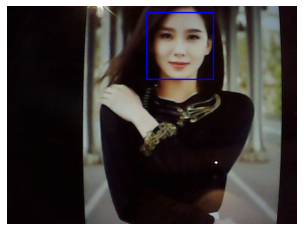

In [8]:
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
if ret:
    frame1, face_num = faceDetect(frame)
    print("发现人脸数量：" + str(face_num))
    img=frame1[:,:,::-1]
    plt.imshow(img)
    plt.axis('off') #不显示坐标
    plt.show()
else:
    print("没有接摄像头或者摄像头被占用！")
cap.release()